<a href="https://colab.research.google.com/github/pujithavarikuti/resume_parser/blob/main/resume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install nltk pandas scikit-learn matplotlib seaborn ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=67e1aa84d06dd9374930924d3485c95911387f3afee1055fed766db3e3e8a2c3
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [4]:
# Imports
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from ydata_profiling import ProfileReport


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
from google.colab import files
uploaded = files.upload()

Saving resume.csv to resume.csv


In [7]:
df = pd.read_csv('resume.csv')
df.head()


,Uniq Id,Crawl Timestamp,Resume Title,Location,Introduction,Work Experience,Education,Skills,Additional Information
0,1,1973-02-15,Full Stack Developer,South Jessicachester,Question art build article throw fast look color.,Peace baby mind rule industry pull person.,Modern simple because next include rate includ...,"React, MongoDB, HTML/CSS, Node.js",Anyone east reach stock indeed make.
1,2,2000-04-17,DevOps Engineer,North Lisaview,Business crime firm scene explain word meet.,Size left business per decision talk. Check tr...,Military generation election beat rule draw af...,"Docker, Git, Ansible, CI/CD",Else learn force build figure writer.
2,3,2009-12-25,Mobile App Developer,East Adammouth,Trouble make reality remember glass.,Research significant main sport card. Close wi...,Into else unit enjoy stay.,"Swift, Firebase, REST APIs, Flutter",Rich day several gas.
3,4,2014-06-12,System Administrator,North Christinamouth,Know hard indicate someone direction.,Will reach call reach see newspaper middle. Ch...,Girl sound see whole.,"VMware, Bash, Linux, Shell Scripting",Field people heart table exist.
4,5,2008-11-10,Full Stack Developer,West Nancyberg,Worry color trade create dog reveal put energy.,Behind majority throughout two nature. Finally...,Low feeling player economy.,"HTML/CSS, Express.js, Node.js, MongoDB",Painting friend big.


In [8]:
df['full_resume'] = (
    df['Introduction'].fillna('') + ' ' +
    df['Work Experience'].fillna('') + ' ' +
    df['Education'].fillna('') + ' ' +
    df['Skills'].fillna('') + ' ' +
    df['Additional Information'].fillna('')
)


In [9]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['cleaned_resume'] = df['full_resume'].apply(preprocess)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Desired skill templates
desired_skills = {
    "Data Analyst": ["excel", "sql", "statistics", "powerbi", "python"],
    "Full Stack Developer": ["javascript", "react", "node", "express", "mongodb"],
    "Backend Developer": ["python", "django", "api", "sql"],
    "Mobile App Developer": ["flutter", "android", "ios", "dart"],
    "Cloud Engineer": ["aws", "azure", "gcp", "devops", "docker"],
    "AI Research Intern": ["machine learning", "deep learning", "nlp", "python"],
    "DevOps Engineer": ["docker", "kubernetes", "jenkins", "ci/cd", "terraform"],
    "Software Engineer": ["java", "python", "oop", "data structures"],
    "UX Designer": ["figma", "adobe xd", "ui", "prototyping"]
}

# Extract skill tokens
def extract_skills(text):
    return set(text.split())

# Match job title to template
def match_job_title(job_title):
    for key in desired_skills:
        if key.lower() in job_title.lower():
            return key
    return None

# Generate feedback
def skill_feedback(row):
    actual = extract_skills(row['cleaned_resume'])
    title = match_job_title(row['Resume Title'])
    if title is None:
        return "Job title not matched to template."

    expected = set(desired_skills[title])
    missing = expected - actual

    if not missing:
        return "Excellent skill match."
    elif len(missing) <= 2:
        return f"Good. Missing: {', '.join(missing)}"
    else:
        return f"Needs improvement. Missing: {', '.join(missing)}"

# Apply feedback
df['feedback'] = df.apply(skill_feedback, axis=1)


In [14]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_resume'])

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


In [15]:
flat_skills = ['python', 'machine learning', 'data analysis', 'nlp', 'deep learning']
features = vectorizer.get_feature_names_out()
skill_indices = [np.where(features == s)[0][0] for s in flat_skills if s in features]

def skill_score(tfidf_vector):
    return tfidf_vector[0, skill_indices].sum()

df['skill_score'] = [skill_score(X[i]) for i in range(X.shape[0])]

# Normalize to 0–10
df['score'] = 10 * (df['skill_score'] - df['skill_score'].min()) / (df['skill_score'].max() - df['skill_score'].min())


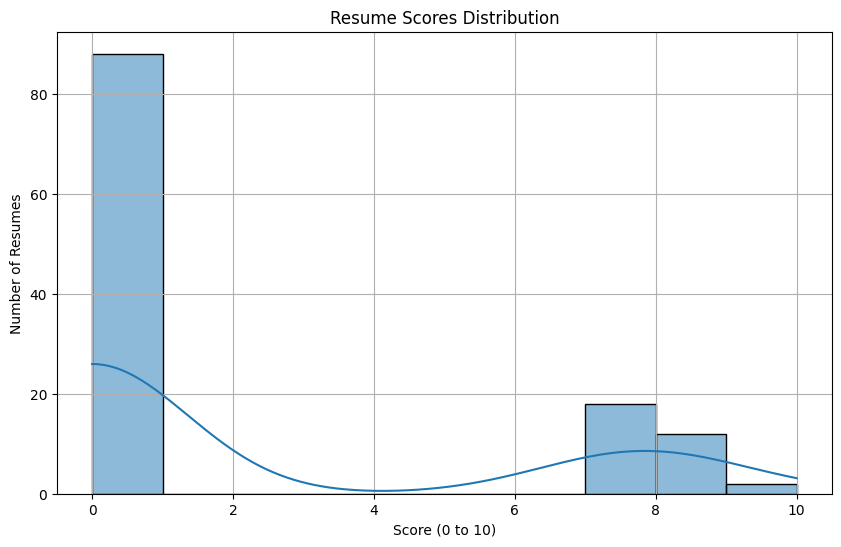

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['score'], bins=10, kde=True)
plt.title("Resume Scores Distribution")
plt.xlabel("Score (0 to 10)")
plt.ylabel("Number of Resumes")
plt.grid(True)
plt.show()


In [17]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, df['cluster'])
print("Silhouette Score:", silhouette)


Silhouette Score: 0.0007242636164394009


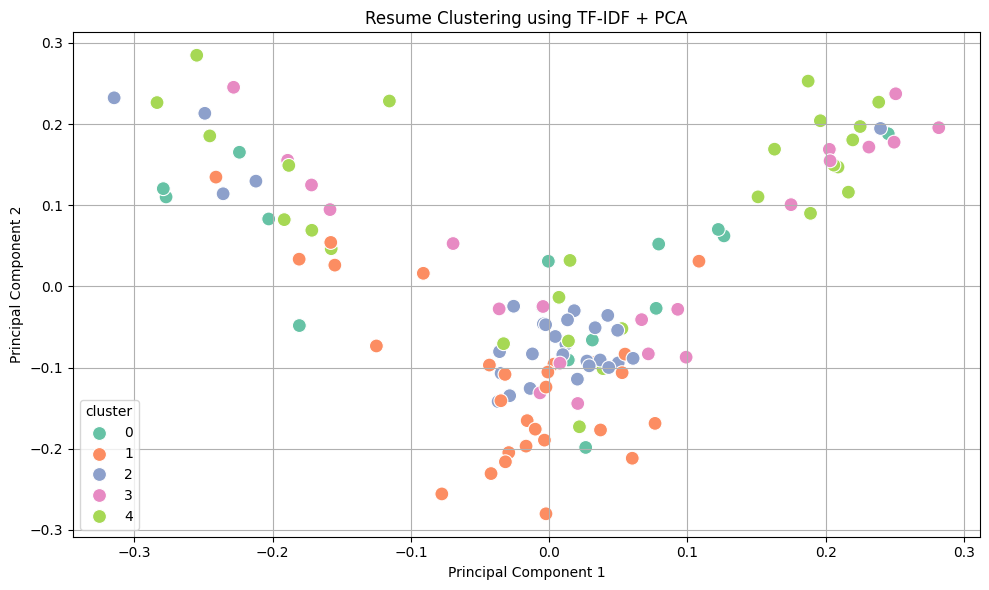

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="cluster", palette="Set2", s=100)
plt.title("Resume Clustering using TF-IDF + PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)
df.to_excel(os.path.join(output_dir, "final_resume_scores.xlsx"), index=False)


In [20]:
ProfileReport(df[['Resume Title', 'feedback', 'score']])


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 24.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]